In [2]:
import pandas as pd
from CHEMDNER_ProcessText import get_chemicals_from_text
from ADE_ProcessText import get_drugs_from_text

In [4]:
all_articles = pd.read_csv("C:/Users/itsma/Documents/ADE/CORD-19-research-challenge/2020-03-13/metadata.csv")

In [5]:
all_articles.columns

Index(['sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license',
       'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text',
       'full_text_file'],
      dtype='object')

In [6]:
all_articles = all_articles.dropna(subset=['title'])
all_articles['title'] = all_articles.apply(lambda x:x.title.lower(), axis=1)

In [7]:
all_articles_vaccine = all_articles[all_articles['title'].str.contains('vaccine|therapy|vaccination',regex=True)]

In [9]:
len(all_articles_vaccine)

2107

In [10]:
all_processed_articles = []
count = 0
for index,row in all_articles.iterrows():
    try:
        count = count + 1
        word_list = get_chemicals_from_text(row['title'])
        drug_list = []

        for index1,row1 in word_list.iterrows():
            drugs = get_chemicals_from_text(row1['word'])
            if(len(drugs)>0):
                drug_list.append(row1)

        row['word_list'] = drug_list

        all_processed_articles.append(row)
        if(count%1000==0):
            print(count, " done.")
    except:
        print("Error processing:",row['title'])

1000  done.
2000  done.
3000  done.
4000  done.
Error processing: pédiatrie
Error processing: abkürzungsverzeichnis
Error processing: abkürzungen
Error processing: abkürzungen
Error processing: abkürzungen
Error processing: abkürzungsverzeichnis
Error processing: abkürzungen
Error processing: abkürzungen
Error processing: abkürzungsverzeichnis
Error processing: abkürzungsverzeichnis
5000  done.
6000  done.
Error processing: sterols of the marine sponge petrosia weinbergi: implications for the absolute configurations of the antiviral orthoesterols and weinbersterols
Error processing: efficient diastereoselective synthesis of a new class of azanucleosides: 2′-homoazanucleosides
7000  done.
8000  done.
9000  done.
10000  done.
11000  done.
Error processing: actualités
Error processing: actualités
12000  done.
Error processing: cholesterol 25-hydroxylase negatively regulates porcine intestinal coronavirus replication by the production of 25-hydroxycholesterol
Error processing: bericht über

In [ ]:
all_processed_articles

In [ ]:
"ABC/XYZ".replace("/"," ")

In [ ]:
import re

In [ ]:
if(re.match("[A-Za-z0-9]","I")):
    print("True")
else:
    print("False")

In [ ]:
len(all_processed_articles)

In [11]:
drug_list = []
for entry in all_processed_articles:
    for drug in entry['word_list']:
        drug_list.append(drug['word'])

In [12]:
len(set(drug_list))

1501

In [ ]:
drug_list

In [16]:
import collections
ctr = collections.Counter(drug_list)
print("Frequency of the elements in the List : ",ctr)

Frequency of the elements in the List :  Counter({'amino acid': 65, 'ribavirin': 56, 'nitric oxide': 51, 'cysteine': 50, 'chloroquine': 40, 'serine': 38, 'sialic acid': 38, 'cholesterol': 30, 'glycyrrhizin': 28, 'zinc': 27, 'amino acids': 22, 'oxygen': 22, 'nucleoside': 20, 'disulfide': 20, 'tyrosine': 20, 'lactate': 19, 'carbon': 19, 'quercetin': 18, 'silver': 18, 'carbohydrate': 17, 'phosphatidylinositol': 17, 'niclosamide': 17, 'glycyrrhizic acid': 16, 'lopinavir': 16, 'oseltamivir': 15, 'ritonavir': 15, 'calcium': 12, 'flavonoids': 12, 'sodium': 11, 'sialic acids': 11, 'nitazoxanide': 11, 'remdesivir': 11, 'lactic acid': 11, 'aurintricarboxylic acid': 10, 'arbidol': 10, 'vitamin d': 10, 'hydrogen peroxide': 10, 'corticosteroids': 10, 'resveratrol': 10, 'serotonin': 9, 'nucleotides': 9, 'lycorine': 9, 'adenosine': 9, 'mannose': 8, 'potassium': 8, 'carboxyl': 8, 'fatty acids': 8, 'lithium chloride': 8, 'carbon dioxide': 8, 'steroid': 8, 'curcumin': 8, 'camp': 8, 'cocaine': 7, 'cyclos

In [17]:
top_20 = ctr.most_common(20)

In [18]:
top_20

[('amino acid', 65),
 ('ribavirin', 56),
 ('nitric oxide', 51),
 ('cysteine', 50),
 ('chloroquine', 40),
 ('serine', 38),
 ('sialic acid', 38),
 ('cholesterol', 30),
 ('glycyrrhizin', 28),
 ('zinc', 27),
 ('amino acids', 22),
 ('oxygen', 22),
 ('nucleoside', 20),
 ('disulfide', 20),
 ('tyrosine', 20),
 ('lactate', 19),
 ('carbon', 19),
 ('quercetin', 18),
 ('silver', 18),
 ('carbohydrate', 17)]

In [19]:
from collections import Counter
drug_counts = Counter(drug_list)
drug_df = pd.DataFrame.from_dict(drug_counts, orient='index')
drug_df.columns = ['count']

In [20]:
drug_df[].columns = ['count']

In [21]:
drug_df = drug_df.sort_values(by='count', ascending=True)

In [24]:
import matplotlib.pyplot as plt

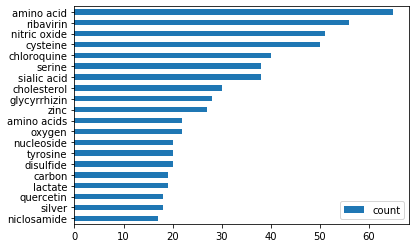

In [28]:
drug_dist = drug_df[drug_df].tail(20).plot.barh()

In [26]:
plt.savefig("C:/Users/itsma/Documents/ADE/CORD-19-research-challenge/2020-03-13/top_chems.jpg", dpi=1000,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [37]:
fig = drug_dist.get_figure()
fig.savefig('C:/Users/itsma/Documents/ADE/CORD-19-research-challenge/2020-03-13/top_chems.jpg',dpi=1000,bbox_inches='tight')

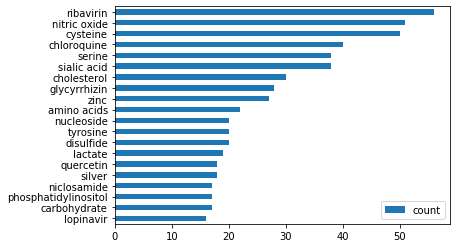

In [36]:
drug_dist = drug_df.tail(20).plot.barh()

In [40]:
for entry in all_processed_articles:
    if('chloroquine' in entry['title']):
        print(entry['title'])
        break

in vitro inhibition of severe acute respiratory syndrome coronavirus by chloroquine
